# Count the usage frequency of API methods

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Download-and-unzip-source-code" data-toc-modified-id="Download-and-unzip-source-code-2">Download and unzip source code</a></span></li><li><span><a href="#Get-the-list-of-built-in-func-inside-ArcGIS-Python-API" data-toc-modified-id="Get-the-list-of-built-in-func-inside-ArcGIS-Python-API-3">Get the list of built-in func inside ArcGIS Python API</a></span></li><li><span><a href="#Count-func-name-frequency-of-a-single-file" data-toc-modified-id="Count-func-name-frequency-of-a-single-file-4">Count func name frequency of a single file</a></span><ul class="toc-item"><li><span><a href="#Convert-.ipynb-to-.py" data-toc-modified-id="Convert-.ipynb-to-.py-4.1">Convert .ipynb to .py</a></span></li><li><span><a href="#Count-word-freq-in-the-python-file" data-toc-modified-id="Count-word-freq-in-the-python-file-4.2">Count word freq in the python file</a></span></li></ul></li><li><span><a href="#Count-func-name-frequency-for-files-inside-a-dir" data-toc-modified-id="Count-func-name-frequency-for-files-inside-a-dir-5">Count func name frequency for files inside a dir</a></span><ul class="toc-item"><li><span><a href="#Batch-convert-.ipynb-to-.py" data-toc-modified-id="Batch-convert-.ipynb-to-.py-5.1">Batch convert .ipynb to .py</a></span></li><li><span><a href="#Count-word-freq-of-python-files-inside-dir" data-toc-modified-id="Count-word-freq-of-python-files-inside-dir-5.2">Count word freq of python files inside dir</a></span></li><li><span><a href="#Visualization-of-func-name-freq" data-toc-modified-id="Visualization-of-func-name-freq-5.3">Visualization of func name freq</a></span><ul class="toc-item"><li><span><a href="#Display-a-vertical-bar-plot" data-toc-modified-id="Display-a-vertical-bar-plot-5.3.1">Display a vertical bar plot</a></span></li><li><span><a href="#Display-a-horizontal-bar-plot" data-toc-modified-id="Display-a-horizontal-bar-plot-5.3.2">Display a horizontal bar plot</a></span></li></ul></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6">Conclusions</a></span></li></ul></div>

## Introduction

Product owners or experienced users of an API are often concerned about the popularity or usage frequencies of the methods or properties built in the products. For instance, Esri is interested to find out what classes/methods/properties are most frequently used by the users of one of their products - <a href="https://esri.github.io/arcgis-python-api/apidoc/html/">Python API for ArcGIS</a>. 

The usage popularity report can be really useful - you can then go on to provide users with helper snippets or function template, or find out what the general users to the API are looking for, or from a reverse-engineering perspective, get to know the user groups (e.g. GIS analysts, data scientists, cartographers, or Python programmers).

Not all users have contributed their use cases with the <a href="https://esri.github.io/arcgis-python-api/apidoc/html/">Python API for ArcGIS</a> to WWW publicly, so it is unlikely that we can master all the usage situations of its methods or properties (a.k.a. how many times being called by user in their scripts). However, by looking at the <a href="https://github.com/Esri/arcgis-python-api"> official site</a> established by Esri that demonstrates plenty of guides or samples, we can calculate the usage frequency of API methods locally from this repo and then use the figures as sampling results to represent the overall popularity of the built-in methods.

In this sample, we will download the remote repo to the local file system, obtain a list of function names which are built-in and exposed publicly by <a href="https://esri.github.io/arcgis-python-api/apidoc/html/">Python API for ArcGIS</a>, convert the IPython Notebooks to Python Source files, count the frequency of function names, and finally create a deliverable visualization of the frequency report. Please stay with us to walk through the entire workflow!

## Download and unzip source code

First, create a new folder inside your current directory if not already exists. The downloading and unzipping operations of the zipped file will happen inside this folder.

In [7]:
import os
dir = "./ipynb_workspace"
if not os.path.exists(dir):
    os.makedirs(dir)

Then use the command line tool `curl` to download the zipped file which contains the guide and sample IPython Notebooks from Esri's <a href="https://github.com/Esri/arcgis-python-api"> official site</a>

In [8]:
!curl -L -o ./ipynb_workspace/master.zip https://github.com/Esri/arcgis-python-api/archive/master.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   127    0   127    0     0    407      0 --:--:-- --:--:-- --:--:--   407

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 6117k    0 6117k    0     0  3694k      0 --:--:--  0:00:01 --:--:-- 6419k
100 18.5M    0 18.5M    0     0  7173k      0 --:--:--  0:00:02 --:--:-- 9776k
100 28.6M    0 28.6M    0     0  8058k      0 --:--:--  0:00:03 --:--:-- 9987k
100 34.0M    0 34.0M    0     0  7514k      0 --:--:--  0:00:04 --:--:-- 8855k
100 39.7M    0 39.7M    0     0  7213k      0 --:--:--  0:00:05 --:--:-- 8240k
100 45.9M    0 45.9M    0     0  7088k      0 --:--:--  0:00:06 --:--:-- 8216k
100 52.7M    0 52.7M    0     0  7073k      0 --:--:--  0:00:07 --:--:-- 7020k
100 60.3M    0 60.3M    0     0  7146k      0 --:-

Once downloading is finished, use a third party module calle `zipfile` to unzip it to a new folder "unzipped_master".

In [9]:
ziped_file = os.path.realpath('./ipynb_workspace/master.zip')

In [10]:
unzipped_folder = os.path.realpath('./ipynb_workspace/unzipped_master')

In [11]:
import zipfile
with zipfile.ZipFile(ziped_file, 'r') as zip_ref:
    zip_ref.extractall(unzipped_folder)

To save the disk space, remove the zipped file once the previous cell is done.

In [12]:
os.remove(ziped_file)

## Get the list of built-in func inside ArcGIS Python API

Because some of the functions are later defined in the IPython Notebooks or Python Source files that are contributed by users, we need to create a list of function names which are only for those built-in functions of the API.

Here, we will take advantage of the <a href="https://esri.github.io/arcgis-python-api/apidoc/html/genindex.html">api ref doc</a> which in theory has listed the function names of all built-ins.

In [13]:
from lxml import html
import requests

page = requests.get('https://esri.github.io/arcgis-python-api/apidoc/html/genindex.html')
tree = html.fromstring(page.content)

#Below will create a list of function names:
references = tree.xpath('//table[@class="indextable genindextable"]//a/text()')

In [14]:
try:
    while(True):
        l = references.remove('[1]')
except ValueError as ve:
    print("list.remove(x): x not in list")

list.remove(x): x not in list


In [15]:
len(references)

2190

The list contains 2190 function names, and we can have a sip of what the list looks like by querying by index.

In [16]:
references[5:10]

['acos() (in module arcgis.raster.functions)',
 'acosh() (in module arcgis.raster.functions)',
 'activate() (arcgis.gis.admin.Webhook method)',
 'active_gis (in module arcgis.env)',
 'add() (arcgis.apps.hub.IndicatorManager method)']

A helper function is defined below, to check if a function name found in the use cases belongs inside the built-in list that we just sorted out above.

In [17]:
def is_method_in_list(method_name, a_list):
    for a_line in a_list:
        if method_name+"()" in a_line:
            return True
        if method_name+" method" in a_line:
            return True
    return False

The goal of this sample is to calculate the function usage frequency of all IPython Notebooks inside the target repo, and we are going to first accomplish the frequency counting part with a single file, then expand to all files inside a directory.

## Count func name frequency of a single file

### Convert .ipynb to .py

Since the IPython Notebooks usually contain Javscript syntax, and there are some situations when a javascript function name is the same as the built-in API function name, in order to avoid such conflicts from happening, we will first convert the .ipynb files to .py files, which will then remove the javascript perspectives.

In [18]:
%cd ipynb_workspace/unzipped_master/arcgis-python-api-master/samples

C:\Users\Chun7642\Documents\ipynb_workspace\unzipped_master\arcgis-python-api-master\samples


In [19]:
import nbconvert

!jupyter nbconvert --to python your_first_notebook.ipynb

[NbConvertApp] Converting notebook your_first_notebook.ipynb to python
[NbConvertApp] Writing 6798 bytes to your_first_notebook.py


### Count word freq in the python file

The `split_word` function defined below is to split a word (a substring divided by space or line breakers) and returns function names that have been called inside this word. For example, for a word `method_a(... method_b(....))`, it should return a list of `[method_a, method_b]`.

Next, the `count_words` function reads in a script or a source file line by line, breaks each line into words, call the `split_word` to retrieve the list of used function names, then feed the result into a new list which at the end will be used to create a Counter object.

In [20]:
from collections import Counter
from re import split

BANNER = "-" * 35

def split_word(x):
    result = []
    
    if "(" not in x:
        return result
    
    x_list = x.split("(",1)
    if x_list[0] == '':
        return result
    
    z0 = x_list[0].rpartition(')')[2]
    z0 = z0.rpartition('.')[2]
    result.append(z0)
    
    if len(x_list)>1 and "(" in x_list[1]:
        z1 = split_word(x_list[1])
        for z in z1:
            result.append(z)
    return result

def count_words(filename):
    collect = []
    with open(filename, "r", encoding="utf8") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            import re
            x_list = [x for x in split(" ", line) if re.match('^[a-z,A-Z]', x)]
            for x in x_list:
                z = split_word(x)
                for z_entry in z:
                    if z_entry == "" or z_entry == '' or z_entry == '-':
                        pass
                    elif "\n" in z_entry or "<" in z_entry or ">" in z_entry:
                        pass
                    elif "\\" in z_entry or "/" in z_entry or "#" in z_entry:
                        pass
                    elif "+" in z_entry or "=" in z_entry or "$" in z_entry:
                        pass
                    elif "]" in z_entry or "[" in z_entry or "'" in z_entry:
                        pass
                    elif "(" in z_entry or ")" in z_entry or "}" in z_entry or "{" in z_entry:
                        pass
                    else:
                        collect.append(z_entry)
    
    print(Counter(collect).most_common(10))
    return Counter(collect)

Calling `count_words` would print the top 10 popular function names of the input file, and return a Counter object that contains all used function names (which might exceed 10).

In [21]:
count_words('your_first_notebook.py')

[('display', 2), ('GIS', 1), ('search', 1), ('map', 1), ('add_layer', 1)]


Counter({'GIS': 1, 'search': 1, 'display': 2, 'map': 1, 'add_layer': 1})

## Count func name frequency for files inside a dir

Now we have successfully counted called function frequency in a single file, we will be more confident to expand the operation to all files inside a directory. Since most of the use cases are located inside these two folders - `samples` and `guide` in the <a href="https://github.com/Esri/arcgis-python-api"> repo</a>, let's use these two directories as destination paths.

### Batch convert .ipynb to .py

Same here, to avoid conflicts with javascript function names, we will convert the .ipynb to .py, but in a batch via command line `for /r %f in (*.ipynb)`.

In [22]:
%%cmd 
for /r %f in (*.ipynb) do jupyter nbconvert --to python %f

Microsoft Windows [Version 10.0.16299.1387]
(c) 2017 Microsoft Corporation. All rights reserved.

(geosaurus_dev_env) C:\Users\Chun7642\Documents\ipynb_workspace\unzipped_master\arcgis-python-api-master\samples>for /r %f in (*.ipynb) do jupyter nbconvert --to python %f

(geosaurus_dev_env) C:\Users\Chun7642\Documents\ipynb_workspace\unzipped_master\arcgis-python-api-master\samples>jupyter nbconvert --to python C:\Users\Chun7642\Documents\ipynb_workspace\unzipped_master\arcgis-python-api-master\samples\your_first_notebook.ipynb 

(geosaurus_dev_env) C:\Users\Chun7642\Documents\ipynb_workspace\unzipped_master\arcgis-python-api-master\samples>jupyter nbconvert --to python C:\Users\Chun7642\Documents\ipynb_workspace\unzipped_master\arcgis-python-api-master\samples\01_get_started\overview.ipynb 

(geosaurus_dev_env) C:\Users\Chun7642\Documents\ipynb_workspace\unzipped_master\arcgis-python-api-master\samples>jupyter nbconvert --to python C:\Users\Chun7642\Documents\ipynb_workspace\unzipped_m

[NbConvertApp] Converting notebook C:\Users\Chun7642\Documents\ipynb_workspace\unzipped_master\arcgis-python-api-master\samples\your_first_notebook.ipynb to python
[NbConvertApp] Writing 6798 bytes to C:\Users\Chun7642\Documents\ipynb_workspace\unzipped_master\arcgis-python-api-master\samples\your_first_notebook.py
[NbConvertApp] Converting notebook C:\Users\Chun7642\Documents\ipynb_workspace\unzipped_master\arcgis-python-api-master\samples\01_get_started\overview.ipynb to python
[NbConvertApp] Writing 1450 bytes to C:\Users\Chun7642\Documents\ipynb_workspace\unzipped_master\arcgis-python-api-master\samples\01_get_started\overview.py
[NbConvertApp] Converting notebook C:\Users\Chun7642\Documents\ipynb_workspace\unzipped_master\arcgis-python-api-master\samples\02_power_users_developers\building_a_change_detection_app_using_jupyter_dashboard.ipynb to python
[NbConvertApp] Writing 7118 bytes to C:\Users\Chun7642\Documents\ipynb_workspace\unzipped_master\arcgis-python-api-master\samples\02

### Count word freq of python files inside dir

Now that the .ipynb files inside the target folder are converted to .py file, we can go on to count the function name frequency of these python file.

Similar to `count_words` defined previously, `count_words_in_files` has added a for loop to exert the same logic to all files inside the target folder. It also return a Counter object of all built-in functions being called in these files, and print the top 20 of them to the cell output.

In [23]:
import glob, os
from pathlib import Path

def count_words_in_files(mydir):
    collect_arcgis_api = []
    collect_others = []
    
    for filename in Path(mydir).glob('**/*.py'):
        
        with open(filename, "r", encoding="utf8") as f:
            for line in f:
                line = line.strip()
                if not line:
                    continue
                import re
                x_list = [x for x in split(" ", line) if re.match('^[a-z,A-Z]', x)]
                for x in x_list:
                    z = split_word(x)
                    for z_entry in z:
                        if z_entry == "" or z_entry == '' or z_entry == '-':
                            pass
                        elif "\n" in z_entry or "<" in z_entry or ">" in z_entry:
                            pass
                        elif "\\" in z_entry or "/" in z_entry or "#" in z_entry:
                            pass
                        elif "+" in z_entry or "=" in z_entry or "$" in z_entry:
                            pass
                        elif "]" in z_entry or "[" in z_entry or "'" in z_entry:
                            pass
                        elif "(" in z_entry or ")" in z_entry or "}" in z_entry or "{" in z_entry:
                            pass
                        else:
                            if is_method_in_list(z_entry, references):
                                collect_arcgis_api.append(z_entry)
                            else:
                                collect_others.append(z_entry)
                        
                        # use lines below to debug if there are any customized functions being mixed up
                        if "def "+z_entry+"(" in x:
                            print(z_entry)

    print(Counter(collect_arcgis_api).most_common(20))
    return Counter(collect_arcgis_api)

Current directory is at `ROOT\ipynb_workspace\unzipped_master\arcgis-python-api-master\samples`, here we can just call `count_words_in_files` and input the relative path.

In [24]:
result = count_words_in_files("./")

[('map', 134), ('add_layer', 134), ('str', 102), ('search', 96), ('head', 80), ('GIS', 72), ('append', 60), ('query', 50), ('write', 47), ('draw', 42), ('get', 30), ('int', 28), ('plot', 27), ('range', 27), ('geocode', 25), ('add', 25), ('items', 16), ('share', 16), ('join', 16), ('publish', 15)]


For the other folder `guide`, just repeat the previous two steps - `nbconvert` and `count_words_in_files` (Note that, we need to change the current directory to `ROOT\ipynb_workspace\unzipped_master\arcgis-python-api-master\guide` before these):

In [ ]:
%%cmd 
cd ../guide/
for /r %f in (*.ipynb) do jupyter nbconvert --to python %f

In [26]:
result2 = count_words_in_files("../guide")

[('GIS', 103), ('map', 102), ('search', 79), ('add_layer', 67), ('geocode', 53), ('get', 49), ('draw', 45), ('query', 31), ('list', 24), ('head', 22), ('type', 19), ('join', 18), ('str', 16), ('add', 14), ('plot', 14), ('batch_geocode', 14), ('FeatureLayer', 12), ('update', 11), ('append', 11), ('from_dict', 11)]


Once we have obtained the Counter object, we can then go on to delete the unzipped folder from the local file system. Note that, the current directory is at `samples`, we need to move up to the workspace level before deleting the unzipped folder.

In [34]:
%cd ../../../

'ROOT/ipynb_workspace'

In [27]:
import shutil

def remove(path):
    """ param <path> could either be relative or absolute. """
    if os.path.isfile(path):
        os.remove(path)  # remove the file
    elif os.path.isdir(path):
        shutil.rmtree(path)  # remove dir and all contains
    else:
        raise ValueError("file {} is not a file or dir.".format(path))

In [31]:
remove(unzipped_folder)

### Visualization of func name freq

With the Counter object, we can easily use `matplotlib.pyplot` to draw the function_name/frequency bar plots. First, let's explore how the results are rendered via a vertical bar plot.

#### Display a vertical bar plot

In [35]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def draw_vertical_bar(counter):
    labels, values = zip(*counter.items())

    indexes = np.arange(len(labels))
    width = 1.5

    plt.bar(indexes, values, width)
    plt.xticks(indexes + width * 0.25, labels, rotation=90)
    plt.show()

For the function frequency in `samples` folder:

In [37]:
plt.rcParams["figure.figsize"] = (25.6,14.4)

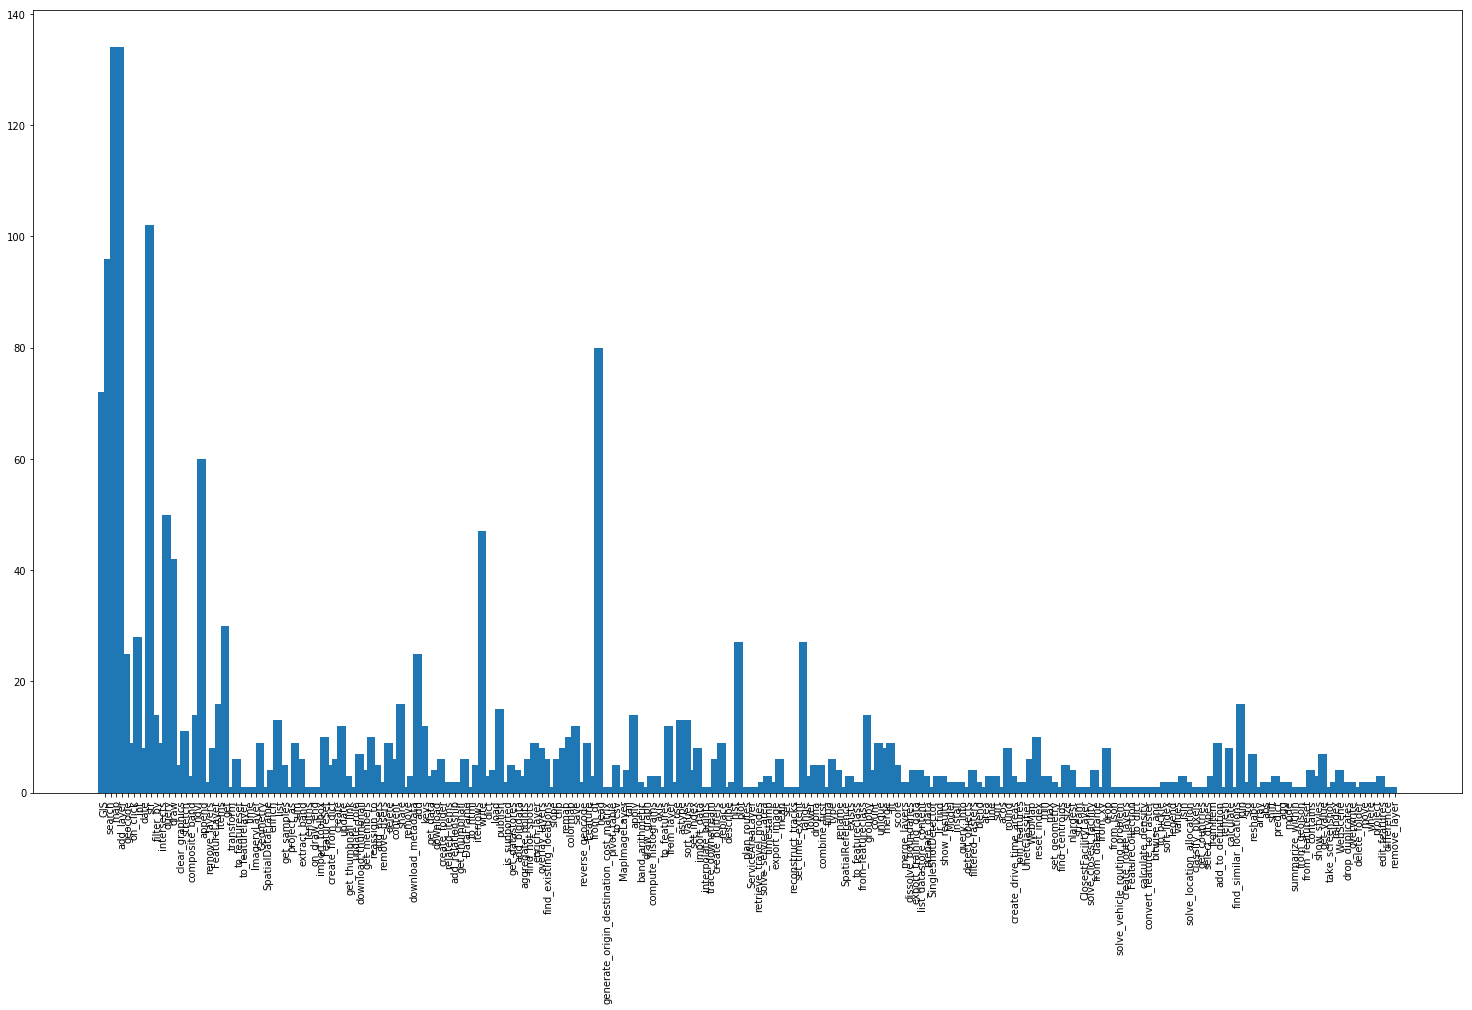

In [38]:
draw_vertical_bar(result)

For the function frequency in `guide` folder:

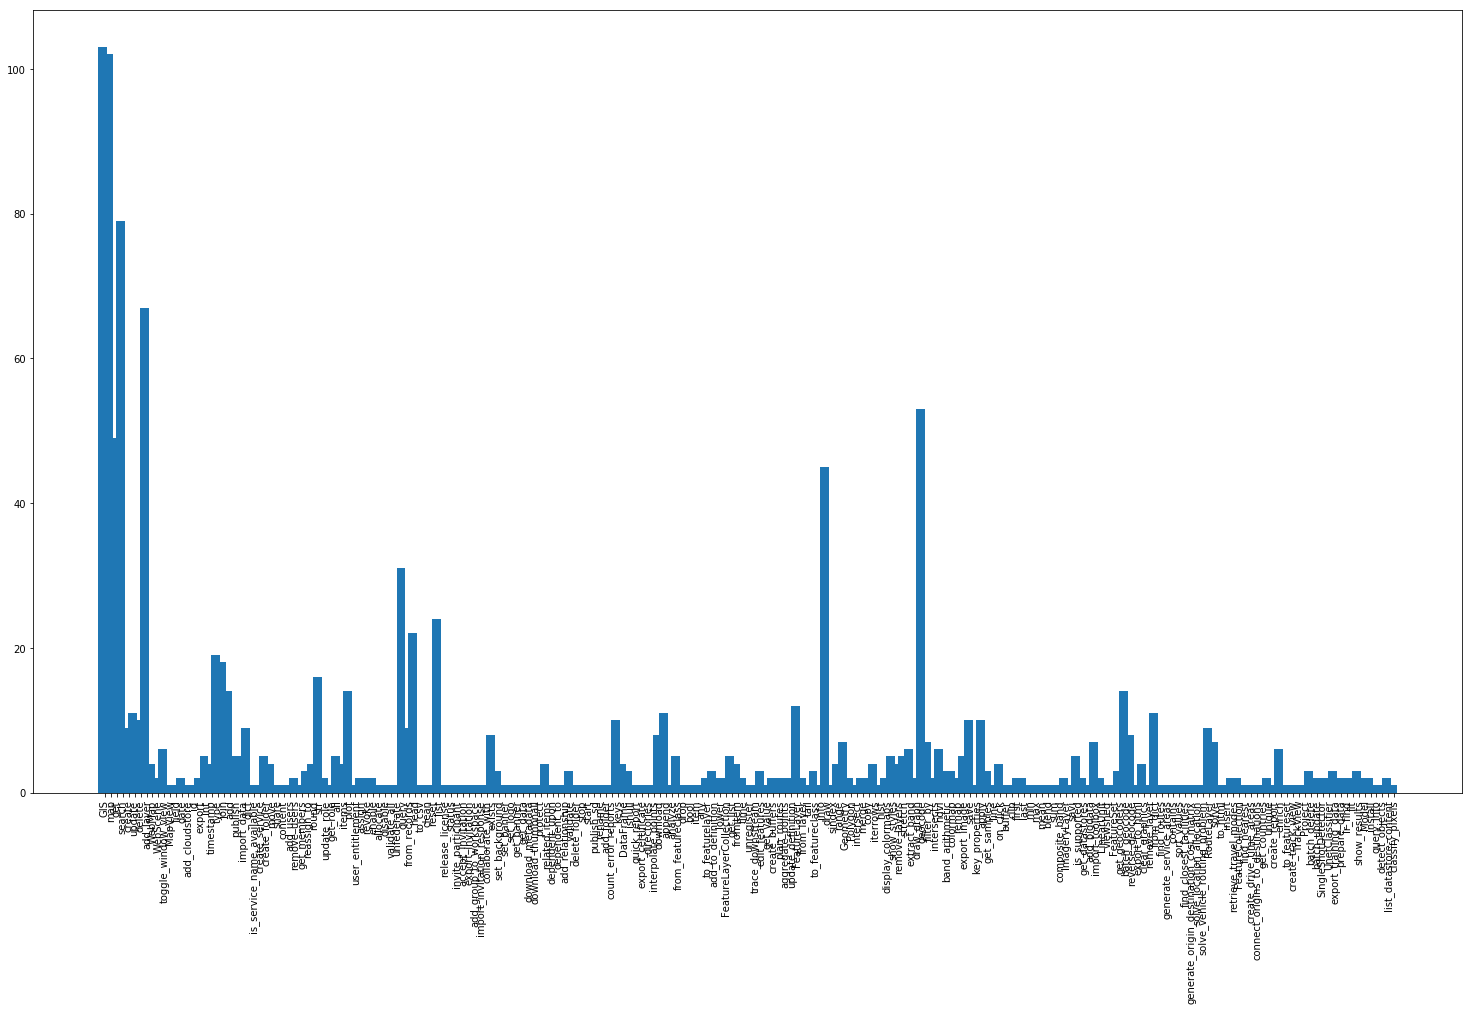

In [39]:
draw_vertical_bar(result2)

Though the two vertical bar plots serves the purpose of visualizing count frequency, the readiness of the plots is quite poor. Next, let's use a different way to visualize the result.

#### Display a horizontal bar plot

First, the x-tick and y-tick from previously shown plots are hard to read, we can change the parameters down below:

In [40]:
import matplotlib.pylab as pylab
print(pylab.rcParams['xtick.labelsize'], pylab.rcParams['ytick.labelsize'])

medium medium


In [41]:
params = {
          'figure.figsize': (6.4,12),
          'axes.labelsize': 'small',
          'xtick.labelsize':'small'
         }
pylab.rcParams.update(params)

Then, instead of showing all callee function names, we can only show the top 30 so the bars will not get as crowded.

Also use `plt.barh` to replace `plt.bar` when in need to show the bars horizontally:

In [42]:
from collections import OrderedDict

def draw_horizontal_bar(counter):
    # only show the top 50 so the bars will not get as crowded
    y = OrderedDict(counter.most_common(30))
    # Counter data, counter is your counter object
    keys = y.keys()
    y_pos = np.arange(len(keys))
    # get the counts for each key, assuming the values are numerical
    performance = [y[k] for k in keys]
    # not sure if you want this :S
    error = np.random.rand(len(keys))

    plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.2)
    plt.yticks(y_pos, keys)
    plt.xlabel('Usage per function')
    plt.title('Which function is most commonly used?')

    plt.show()

For the function frequency in `samples` folder:

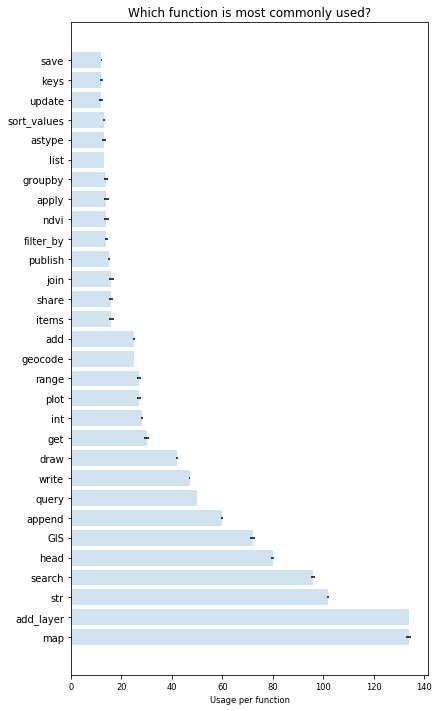

In [43]:
draw_horizontal_bar(result)

For the function frequency in `guide` folder:

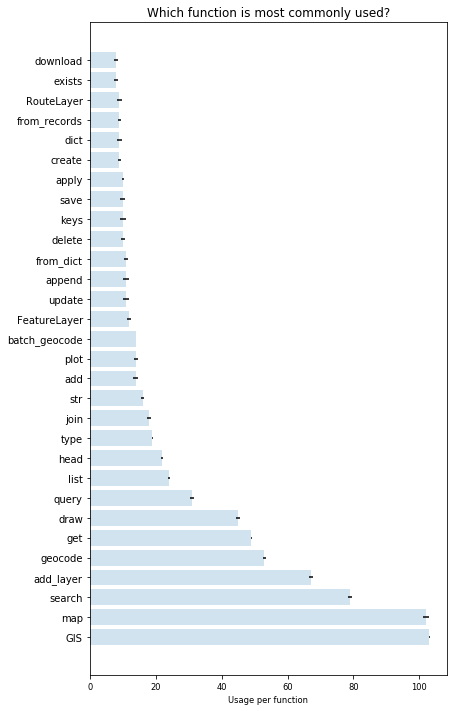

In [44]:
draw_horizontal_bar(result2)

From the horizontal bar plots, it is obvious that most of users used the Python API for ArcGIS to establish connection to the GIS object and create a map view by adding an existing layer item inside the GIS object.

## Conclusions

This sample has introduced an approach for product owners or experienced users of an API to count and visualize the usage frequency or so called popularities of built-in methods, via these steps: 1. download the remote repo to the local file system, 2. obtain a list of function names which are built-in and exposed publicly by Python API for ArcGIS, 3. convert the IPython Notebooks to Python Source files, 4. count the frequency of function names, and 5. finally create a deliverable visualization of the frequency report.

With the usage popularity report, you can then go on to provide users with helper snippets or function template, or find out what the general users to the API are looking for, or from a reverse-engineering perspective, get to know the user groups (e.g. GIS analysts, data scientists, cartographers, or Python programmers).